In [1370]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Running Time

In [1371]:
df = pd.read_csv(r"C:\Users\annas\Downloads\Running Times - Wildemount - WM Campaign.csv")
df.head(10)

,Episode,Full time,Gameplay Time,Game 1st Half,Game 2nd Half,Mid Break,Unnamed: 6,1st start,1st end,2nd start,2nd end
0,Total,556:34:24,483:40:09,259:11:18,224:28:51,42:43:30,NaN,24:49:15,NaN,NaN,NaN
1,Avg,3:56:50,3:25:49,1:50:18,1:35:31,0:18:11,NaN,0:10:34,2:00:51,2:19:02,3:54:34
2,C2E001,3:17:21,2:38:49,1:14:24,1:24:25,0:19:18,NaN,0:16:39,1:31:03,1:50:21,3:14:46
3,C2E002,4:12:03,3:45:33,1:57:22,1:48:11,0:15:16,NaN,0:08:34,2:05:56,2:21:12,4:09:23
4,C2E003,3:49:08,3:24:42,2:05:43,1:18:59,0:15:50,NaN,0:07:12,2:12:55,2:28:45,3:47:44
5,C2E004,3:44:35,3:19:38,1:49:21,1:30:17,0:13:34,NaN,0:08:56,1:58:17,2:11:51,3:42:08
6,C2E005,3:29:28,3:03:36,2:47:03,0:16:33,0:16:28,NaN,0:09:10,2:56:13,3:12:41,3:29:14
7,C2E006,3:55:15,3:29:41,2:11:03,1:18:38,0:15:01,NaN,0:08:08,2:19:11,2:34:12,3:52:50
8,C2E007,4:16:45,3:48:39,2:14:55,1:33:44,0:15:04,NaN,0:09:07,2:24:02,2:39:06,4:12:50
9,C2E008,3:34:12,3:03:59,1:21:00,1:42:59,0:18:22,NaN,0:10:13,1:31:13,1:49:35,3:32:34


## Clean up

In [1372]:
df = df.drop([0, 1])
df.head(20)

,Episode,Full time,Gameplay Time,Game 1st Half,Game 2nd Half,Mid Break,Unnamed: 6,1st start,1st end,2nd start,2nd end
2,C2E001,3:17:21,2:38:49,1:14:24,1:24:25,0:19:18,NaN,0:16:39,1:31:03,1:50:21,3:14:46
3,C2E002,4:12:03,3:45:33,1:57:22,1:48:11,0:15:16,NaN,0:08:34,2:05:56,2:21:12,4:09:23
4,C2E003,3:49:08,3:24:42,2:05:43,1:18:59,0:15:50,NaN,0:07:12,2:12:55,2:28:45,3:47:44
5,C2E004,3:44:35,3:19:38,1:49:21,1:30:17,0:13:34,NaN,0:08:56,1:58:17,2:11:51,3:42:08
6,C2E005,3:29:28,3:03:36,2:47:03,0:16:33,0:16:28,NaN,0:09:10,2:56:13,3:12:41,3:29:14
7,C2E006,3:55:15,3:29:41,2:11:03,1:18:38,0:15:01,NaN,0:08:08,2:19:11,2:34:12,3:52:50
8,C2E007,4:16:45,3:48:39,2:14:55,1:33:44,0:15:04,NaN,0:09:07,2:24:02,2:39:06,4:12:50
9,C2E008,3:34:12,3:03:59,1:21:00,1:42:59,0:18:22,NaN,0:10:13,1:31:13,1:49:35,3:32:34
10,C2E009,3:30:41,3:01:40,1:46:31,1:15:09,0:15:42,NaN,0:11:17,1:57:48,2:13:30,3:28:39
11,C2E010,4:00:46,3:10:38,1:33:43,1:36:55,0:17:08,NaN,0:11:19,1:45:02,2:02:10,3:39:05


In [1373]:
df = df.drop(['Unnamed: 6','Game 1st Half', 'Game 2nd Half', '1st start', '1st end', '2nd start', '2nd end'], axis = 1)
df.head(20)

,Episode,Full time,Gameplay Time,Mid Break
2,C2E001,3:17:21,2:38:49,0:19:18
3,C2E002,4:12:03,3:45:33,0:15:16
4,C2E003,3:49:08,3:24:42,0:15:50
5,C2E004,3:44:35,3:19:38,0:13:34
6,C2E005,3:29:28,3:03:36,0:16:28
7,C2E006,3:55:15,3:29:41,0:15:01
8,C2E007,4:16:45,3:48:39,0:15:04
9,C2E008,3:34:12,3:03:59,0:18:22
10,C2E009,3:30:41,3:01:40,0:15:42
11,C2E010,4:00:46,3:10:38,0:17:08


In [1374]:
df['Episode'] = df['Episode'].str.replace('C2E', '')
df.head(30)

,Episode,Full time,Gameplay Time,Mid Break
2,001,3:17:21,2:38:49,0:19:18
3,002,4:12:03,3:45:33,0:15:16
4,003,3:49:08,3:24:42,0:15:50
5,004,3:44:35,3:19:38,0:13:34
6,005,3:29:28,3:03:36,0:16:28
7,006,3:55:15,3:29:41,0:15:01
8,007,4:16:45,3:48:39,0:15:04
9,008,3:34:12,3:03:59,0:18:22
10,009,3:30:41,3:01:40,0:15:42
11,010,4:00:46,3:10:38,0:17:08


In [1375]:
#arc 1
df1 = df.iloc [0:25]
df1

,Episode,Full time,Gameplay Time,Mid Break
2,001,3:17:21,2:38:49,0:19:18
3,002,4:12:03,3:45:33,0:15:16
4,003,3:49:08,3:24:42,0:15:50
5,004,3:44:35,3:19:38,0:13:34
6,005,3:29:28,3:03:36,0:16:28
7,006,3:55:15,3:29:41,0:15:01
8,007,4:16:45,3:48:39,0:15:04
9,008,3:34:12,3:03:59,0:18:22
10,009,3:30:41,3:01:40,0:15:42
11,010,4:00:46,3:10:38,0:17:08


In [1376]:
#arc 2
df2 = df.iloc [25:47]
df2

,Episode,Full time,Gameplay Time,Mid Break
27,026,4:56:44,4:27:09,0:18:25
28,027,4:05:50,3:39:21,0:16:03
29,028,4:14:45,3:45:32,0:17:39
30,029,4:20:30,3:32:45,0:23:57
31,030,3:38:11,3:07:23,0:18:24
32,031,3:26:00,3:01:20,0:15:26
33,032,3:50:37,3:16:56,0:20:07
34,033,4:01:34,3:25:10,0:21:17
35,034,4:33:42,3:57:32,0:24:06
36,035,3:53:53,3:24:44,0:16:51


In [1377]:
#arc 3
df3 = df.iloc [47:69]
df3

,Episode,Full time,Gameplay Time,Mid Break
49,048,4:11:03,3:41:43,0:17:01
50,049,3:46:16,3:13:02,0:19:06
51,050,4:16:03,3:40:45,0:23:22
52,051,4:07:09,3:36:26,0:19:55
53,052,4:09:18,3:33:34,0:21:58
54,053,3:35:06,3:04:06,0:20:03
55,054,3:29:59,2:56:33,0:19:33
56,055,4:20:04,3:47:53,0:18:46
57,056,2:57:50,2:19:15,0:21:10
58,057,3:38:52,3:03:32,0:26:05


In [1378]:
#arc 4
df4 = df.iloc [69:91]
df4

,Episode,Full time,Gameplay Time,Mid Break
71,070,3:53:22,3:16:57,0:21:49
72,071,3:21:43,2:46:37,0:21:24
73,072,3:29:26,2:51:39,0:19:35
74,073,4:09:14,3:22:04,0:23:42
75,074,3:59:55,3:30:16,0:17:18
76,075,4:08:57,3:38:19,0:17:39
77,076,4:52:00,4:22:11,0:18:21
78,077,3:55:20,3:16:14,0:24:42
79,078,4:04:58,3:32:54,0:20:09
80,079,4:14:09,3:39:30,0:19:50


In [1379]:
#arc 5
df5 = df.iloc [91:112]
df5

,Episode,Full time,Gameplay Time,Mid Break
93,092,4:08:25,3:31:49,0:20:45
94,093,3:46:57,3:13:12,0:18:59
95,094,3:56:25,3:21:04,0:19:17
96,095,3:37:39,3:03:16,0:19:38
97,096,4:31:49,3:59:56,0:22:00
98,097,4:12:06,3:32:49,0:22:34
99,098,4:56:54,4:28:49,0:17:28
100,099,3:37:34,3:03:25,0:20:09
101,100,3:28:09,2:56:21,0:15:49
102,101,3:34:24,3:10:04,0:15:25


In [1380]:
#arc 6
df6 = df.iloc [112:141]
df6

,Episode,Full time,Gameplay Time,Mid Break
114,113,4:01:05,3:36:39,0:15:11
115,114,3:40:26,3:03:44,0:16:04
116,115,4:06:55,3:43:30,0:15:12
117,116,4:03:19,3:35:42,0:16:00
118,117,4:12:46,3:43:46,0:15:14
119,118,4:29:11,4:02:29,0:16:03
120,119,3:24:42,3:01:46,0:15:18
121,120,3:47:18,3:15:58,0:15:53
122,121,3:16:11,2:50:58,0:16:02
123,122,3:34:23,3:05:55,0:15:27


## Summary

In [1381]:
# Convert time_column to timedelta
df['Full time'] = pd.to_timedelta(df['Full time'])

# Convert timedelta to total seconds
df['time_seconds'] = df['Full time'].dt.total_seconds()

# Calculate the mean of time_seconds
mean_seconds = df['time_seconds'].mean()

# Convert mean back to timedelta
mean_timedelta = pd.to_timedelta(mean_seconds, unit='s')

# Print the mean FULL time
print("Mean Time:", mean_timedelta)

Mean Time: 0 days 03:56:50.382978723


In [1382]:
# Convert time_column to timedelta
df['Full time'] = pd.to_timedelta(df['Full time'])

# Find the maximum value in time_column
max_time = df['Full time'].max()

# Convert max_time back to hours:minutes:seconds format
max_time_str = str(max_time)

# Print the maximum FULL time
print("Maximum Time:", max_time_str)

Maximum Time: 0 days 06:54:44


In [1383]:
min_time = df['Full time'].min()
# Convert max_time back to hours:minutes:seconds format
min_time_str = str(min_time)

# Print the minimum FULL time
print("Min Time:", min_time_str)

Min Time: 0 days 02:57:50


In [1384]:
# Convert time_column to timedelta
df['Gameplay Time'] = pd.to_timedelta(df['Gameplay Time'])

# Convert timedelta to total seconds
df['time_seconds'] = df['Gameplay Time'].dt.total_seconds()

# Calculate the mean of time_seconds
mean_seconds = df['time_seconds'].mean()

# Convert mean back to timedelta
mean_timedelta = pd.to_timedelta(mean_seconds, unit='s')

# Print the mean GAME time
print("Mean Time:", mean_timedelta)

Mean Time: 0 days 03:25:49


In [1385]:
# Convert time_column to timedelta
df['Mid Break'] = pd.to_timedelta(df['Mid Break'])

# Convert timedelta to total seconds
df['time_seconds'] = df['Mid Break'].dt.total_seconds()

# Calculate the mean of time_seconds
mean_seconds = df['time_seconds'].mean()

# Convert mean back to timedelta
mean_timedelta = pd.to_timedelta(mean_seconds, unit='s')

# Print the mean MID BREAK time
print("Mean Time:", mean_timedelta)

Mean Time: 0 days 00:18:10.851063830


## First Visual

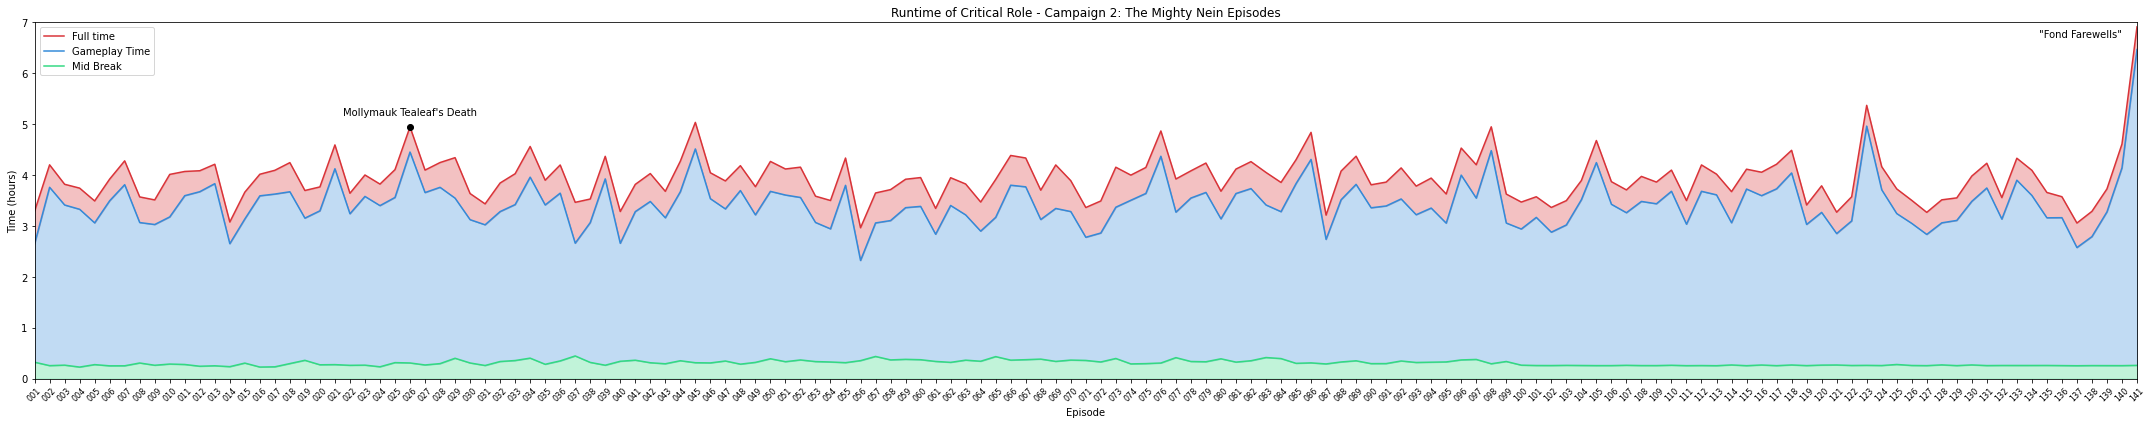

In [1386]:
df['Full time'] = pd.to_timedelta(df['Full time'])
df['Gameplay Time'] = pd.to_timedelta(df['Gameplay Time'])
df['Mid Break'] = pd.to_timedelta(df['Mid Break'])

# Convert timedelta to hours
df['Full time'] = df['Full time'].dt.total_seconds() / 3600
df['Gameplay Time'] = df['Gameplay Time'].dt.total_seconds() / 3600
df['Mid Break'] = df['Mid Break'].dt.total_seconds() / 3600

# Plot the data
plt.figure(figsize=(30, 6))
plt.plot(df['Episode'], df['Full time'], color = '#d93338', label='Full time') #can add marker='o' to put circles on points
plt.plot(df['Episode'], df['Gameplay Time'], color = '#338ad9', label='Gameplay Time')
plt.plot(df['Episode'], df['Mid Break'], color = '#33d982', label='Mid Break')

# Fill the areas between the lines
plt.fill_between(df['Episode'], df['Full time'], df['Gameplay Time'], color='#d93338', alpha=0.3)
plt.fill_between(df['Episode'], df['Gameplay Time'], df['Mid Break'], color='#338ad9', alpha=0.3)
plt.fill_between(df['Episode'], df['Mid Break'], color='#33d982', alpha=0.3)


# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Time (hours)')
plt.xlim('001','141');
plt.ylim(0, 7)
plt.title('Runtime of Critical Role - Campaign 2: The Mighty Nein Episodes')
plt.legend()

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation=45, fontsize = 8)

# Add text labels
plt.text(df['Episode'][27], df['Full time'][27] + .2, 'Mollymauk Tealeaf\'s Death', ha='center', va='bottom', fontsize=10)
plt.plot(df['Episode'][27], df['Full time'][27], marker='o', color='black')

plt.text(df['Episode'][141], df['Full time'][142] - .2, '\"Fond Farewells\"', ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## Arc Visuals

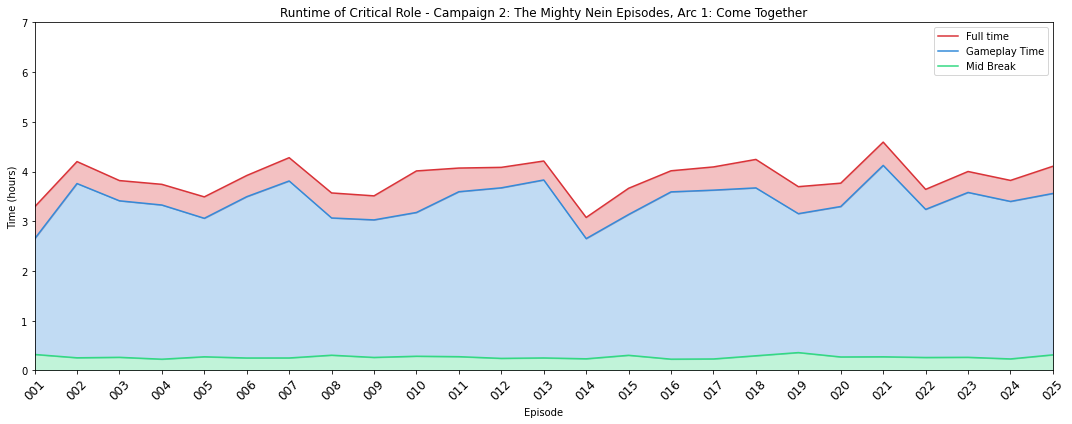

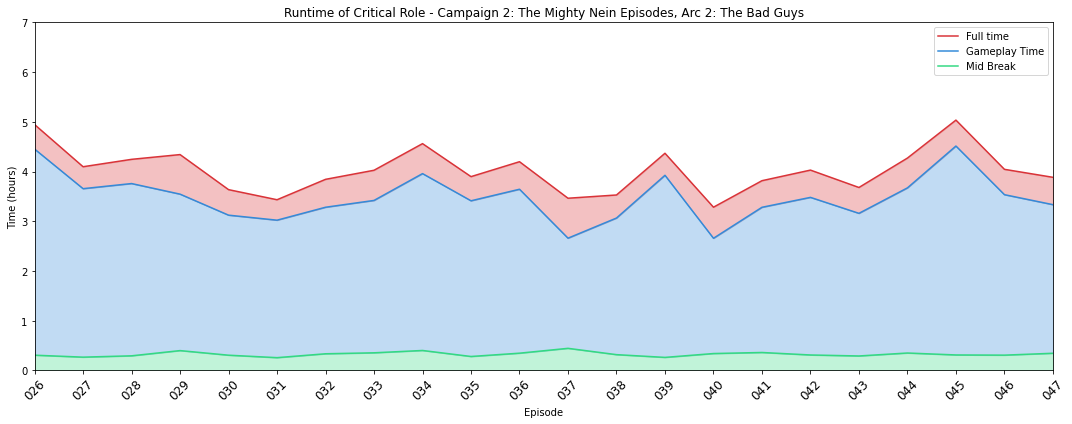

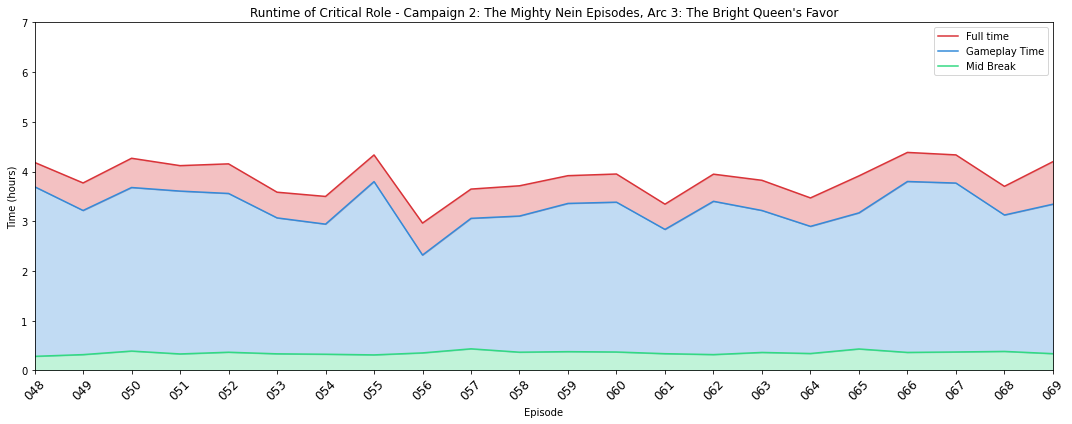

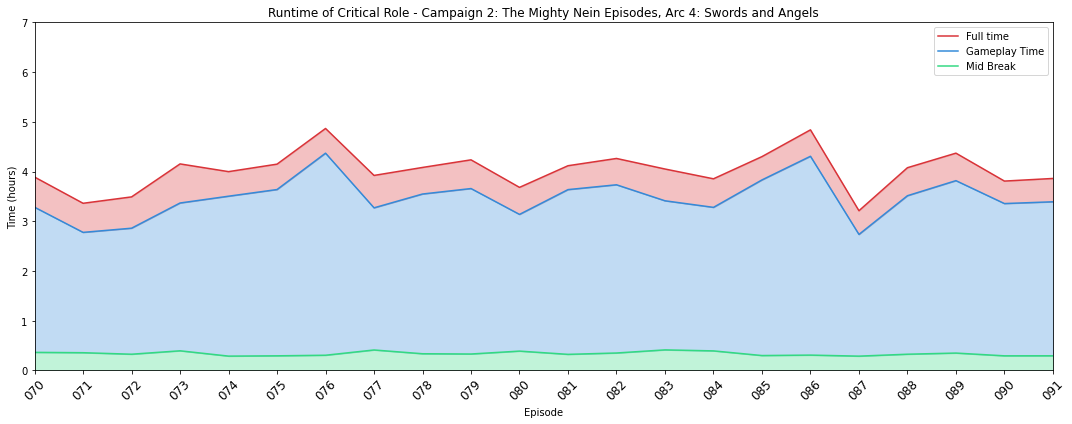

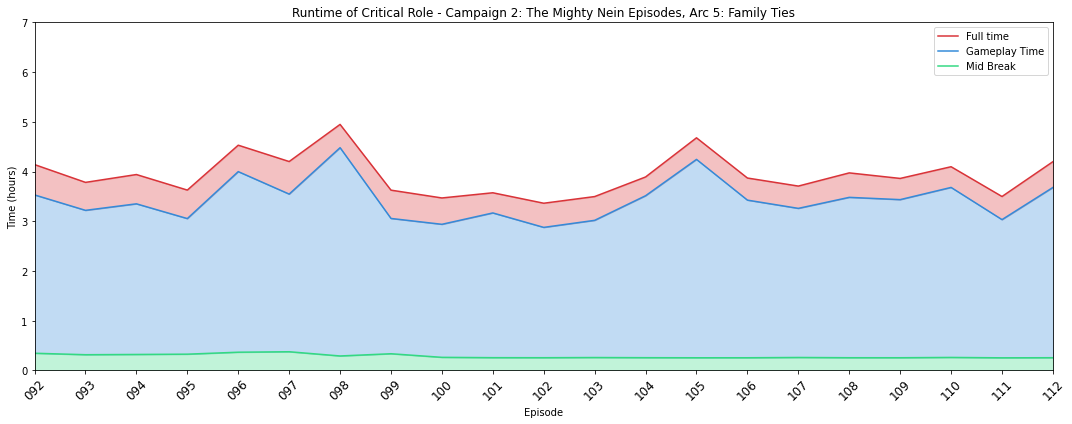

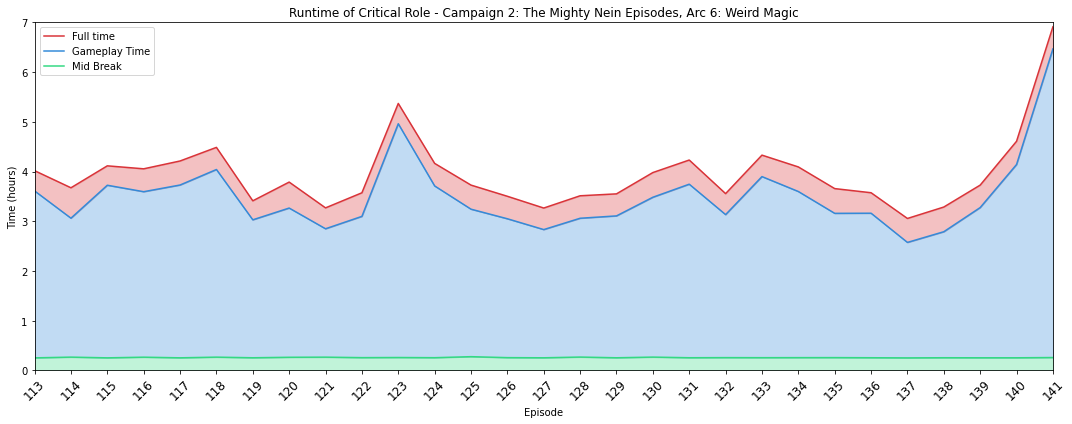

In [1387]:
pd.set_option('mode.chained_assignment', None)
df1['Full time'] = pd.to_timedelta(df1['Full time'])
df1['Gameplay Time'] = pd.to_timedelta(df1['Gameplay Time'])
df1['Mid Break'] = pd.to_timedelta(df1['Mid Break'])

# Convert timedelta to hours
df1['Full time'] = df1['Full time'].dt.total_seconds() / 3600
df1['Gameplay Time'] = df1['Gameplay Time'].dt.total_seconds() / 3600
df1['Mid Break'] = df1['Mid Break'].dt.total_seconds() / 3600

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(df1['Episode'], df1['Full time'], color = '#d93338', label='Full time') #can add marker='o' to put circles on points
plt.plot(df1['Episode'], df1['Gameplay Time'], color = '#338ad9', label='Gameplay Time')
plt.plot(df1['Episode'], df1['Mid Break'], color = '#33d982', label='Mid Break')

# Fill the areas between the lines
plt.fill_between(df1['Episode'], df1['Full time'], df1['Gameplay Time'], color='#d93338', alpha=0.3)
plt.fill_between(df1['Episode'], df1['Gameplay Time'], df1['Mid Break'], color='#338ad9', alpha=0.3)
plt.fill_between(df1['Episode'], df1['Mid Break'], color='#33d982', alpha=0.3)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Time (hours)')
plt.xlim('001','025');
plt.ylim(0, 7)
plt.title('Runtime of Critical Role - Campaign 2: The Mighty Nein Episodes, Arc 1: Come Together')
plt.legend()

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation=45, fontsize = 12)

# Show the plot
plt.tight_layout()
plt.show()

#######################################################

df2['Full time'] = pd.to_timedelta(df2['Full time'])
df2['Gameplay Time'] = pd.to_timedelta(df2['Gameplay Time'])
df2['Mid Break'] = pd.to_timedelta(df2['Mid Break'])

# Convert timedelta to hours
df2['Full time'] = df2['Full time'].dt.total_seconds() / 3600
df2['Gameplay Time'] = df2['Gameplay Time'].dt.total_seconds() / 3600
df2['Mid Break'] = df2['Mid Break'].dt.total_seconds() / 3600

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(df2['Episode'], df2['Full time'], color = '#d93338', label='Full time') #can add marker='o' to put circles on points
plt.plot(df2['Episode'], df2['Gameplay Time'], color = '#338ad9', label='Gameplay Time')
plt.plot(df2['Episode'], df2['Mid Break'], color = '#33d982', label='Mid Break')

# Fill the areas between the lines
plt.fill_between(df2['Episode'], df2['Full time'], df2['Gameplay Time'], color='#d93338', alpha=0.3)
plt.fill_between(df2['Episode'], df2['Gameplay Time'], df2['Mid Break'], color='#338ad9', alpha=0.3)
plt.fill_between(df2['Episode'], df2['Mid Break'], color='#33d982', alpha=0.3)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Time (hours)')
plt.xlim('026','047');
plt.ylim(0, 7)
plt.title('Runtime of Critical Role - Campaign 2: The Mighty Nein Episodes, Arc 2: The Bad Guys')
plt.legend()

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation=45, fontsize = 12)

# Show the plot
plt.tight_layout()
plt.show()

############################

df3['Full time'] = pd.to_timedelta(df3['Full time'])
df3['Gameplay Time'] = pd.to_timedelta(df3['Gameplay Time'])
df3['Mid Break'] = pd.to_timedelta(df3['Mid Break'])

# Convert timedelta to hours
df3['Full time'] = df3['Full time'].dt.total_seconds() / 3600
df3['Gameplay Time'] = df3['Gameplay Time'].dt.total_seconds() / 3600
df3['Mid Break'] = df3['Mid Break'].dt.total_seconds() / 3600

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(df3['Episode'], df3['Full time'], color = '#d93338', label='Full time') #can add marker='o' to put circles on points
plt.plot(df3['Episode'], df3['Gameplay Time'], color = '#338ad9', label='Gameplay Time')
plt.plot(df3['Episode'], df3['Mid Break'], color = '#33d982', label='Mid Break')

# Fill the areas between the lines
plt.fill_between(df3['Episode'], df3['Full time'], df3['Gameplay Time'], color='#d93338', alpha=0.3)
plt.fill_between(df3['Episode'], df3['Gameplay Time'], df3['Mid Break'], color='#338ad9', alpha=0.3)
plt.fill_between(df3['Episode'], df3['Mid Break'], color='#33d982', alpha=0.3)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Time (hours)')
plt.xlim('048','069');
plt.ylim(0, 7)
plt.title('Runtime of Critical Role - Campaign 2: The Mighty Nein Episodes, Arc 3: The Bright Queen\'s Favor')
plt.legend()

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation=45, fontsize = 12)

# Show the plot
plt.tight_layout()
plt.show()

############################

df4['Full time'] = pd.to_timedelta(df4['Full time'])
df4['Gameplay Time'] = pd.to_timedelta(df4['Gameplay Time'])
df4['Mid Break'] = pd.to_timedelta(df4['Mid Break'])

# Convert timedelta to hours
df4['Full time'] = df4['Full time'].dt.total_seconds() / 3600
df4['Gameplay Time'] = df4['Gameplay Time'].dt.total_seconds() / 3600
df4['Mid Break'] = df4['Mid Break'].dt.total_seconds() / 3600

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(df4['Episode'], df4['Full time'], color = '#d93338', label='Full time') #can add marker='o' to put circles on points
plt.plot(df4['Episode'], df4['Gameplay Time'], color = '#338ad9', label='Gameplay Time')
plt.plot(df4['Episode'], df4['Mid Break'], color = '#33d982', label='Mid Break')

# Fill the areas between the lines
plt.fill_between(df4['Episode'], df4['Full time'], df4['Gameplay Time'], color='#d93338', alpha=0.3)
plt.fill_between(df4['Episode'], df4['Gameplay Time'], df4['Mid Break'], color='#338ad9', alpha=0.3)
plt.fill_between(df4['Episode'], df4['Mid Break'], color='#33d982', alpha=0.3)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Time (hours)')
plt.xlim('070','091');
plt.ylim(0, 7)
plt.title('Runtime of Critical Role - Campaign 2: The Mighty Nein Episodes, Arc 4: Swords and Angels')
plt.legend()

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation=45, fontsize = 12)

# Show the plot
plt.tight_layout()
plt.show()

############################

df5['Full time'] = pd.to_timedelta(df5['Full time'])
df5['Gameplay Time'] = pd.to_timedelta(df5['Gameplay Time'])
df5['Mid Break'] = pd.to_timedelta(df5['Mid Break'])

# Convert timedelta to hours
df5['Full time'] = df5['Full time'].dt.total_seconds() / 3600
df5['Gameplay Time'] = df5['Gameplay Time'].dt.total_seconds() / 3600
df5['Mid Break'] = df5['Mid Break'].dt.total_seconds() / 3600

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(df5['Episode'], df5['Full time'], color = '#d93338', label='Full time') #can add marker='o' to put circles on points
plt.plot(df5['Episode'], df5['Gameplay Time'], color = '#338ad9', label='Gameplay Time')
plt.plot(df5['Episode'], df5['Mid Break'], color = '#33d982', label='Mid Break')

# Fill the areas between the lines
plt.fill_between(df5['Episode'], df5['Full time'], df5['Gameplay Time'], color='#d93338', alpha=0.3)
plt.fill_between(df5['Episode'], df5['Gameplay Time'], df5['Mid Break'], color='#338ad9', alpha=0.3)
plt.fill_between(df5['Episode'], df5['Mid Break'], color='#33d982', alpha=0.3)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Time (hours)')
plt.xlim('092','112');
plt.ylim(0, 7)
plt.title('Runtime of Critical Role - Campaign 2: The Mighty Nein Episodes, Arc 5: Family Ties')
plt.legend()

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation=45, fontsize = 12)

# Show the plot
plt.tight_layout()
plt.show()

############################

df6['Full time'] = pd.to_timedelta(df6['Full time'])
df6['Gameplay Time'] = pd.to_timedelta(df6['Gameplay Time'])
df6['Mid Break'] = pd.to_timedelta(df6['Mid Break'])

# Convert timedelta to hours
df6['Full time'] = df6['Full time'].dt.total_seconds() / 3600
df6['Gameplay Time'] = df6['Gameplay Time'].dt.total_seconds() / 3600
df6['Mid Break'] = df6['Mid Break'].dt.total_seconds() / 3600

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(df6['Episode'], df6['Full time'], color = '#d93338', label='Full time') #can add marker='o' to put circles on points
plt.plot(df6['Episode'], df6['Gameplay Time'], color = '#338ad9', label='Gameplay Time')
plt.plot(df6['Episode'], df6['Mid Break'], color = '#33d982', label='Mid Break')

# Fill the areas between the lines
plt.fill_between(df6['Episode'], df6['Full time'], df6['Gameplay Time'], color='#d93338', alpha=0.3)
plt.fill_between(df6['Episode'], df6['Gameplay Time'], df6['Mid Break'], color='#338ad9', alpha=0.3)
plt.fill_between(df6['Episode'], df6['Mid Break'], color='#33d982', alpha=0.3)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Time (hours)')
plt.xlim('113','141');
plt.ylim(0, 7)
plt.title('Runtime of Critical Role - Campaign 2: The Mighty Nein Episodes, Arc 6: Weird Magic')
plt.legend()

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation=45, fontsize = 12)

# Show the plot
plt.tight_layout()
plt.show()

# Combat Times

In [1388]:
combatdf = pd.read_csv(r"C:\Users\annas\Downloads\Copy of Running Times - Wildemount - WM Combat Times (2).csv")
combatdf.head(10)

,Encounter,Episode,Total Length,Start Time,End Time,Rounds,In-game Time,Unnamed: 7,Notes
0,Total of All Episodes,NaN,108:40:11,NaN,NaN,571.00,0:57:06,NaN,NaN
1,Average,NaN,0:47:15,1:48:28,2:35:43,4.14,0:00:25,NaN,NaN
2,Husks - Carnival Patrons,C2E001,0:31:38,2:24:16,2:55:54,2.00,0:00:12,NaN,NaN
3,Husks - Crownsguard,C2E003,0:24:28,0:09:16,0:33:44,2.00,0:00:12,NaN,NaN
4,"Kylre, Toya, Imps",C2E003,0:56:33,2:43:14,3:39:47,5.00,0:00:30,NaN,NaN
5,Expositor Dairon,C2E004,0:09:58,2:19:46,2:29:44,6.00,0:00:36,NaN,NaN
6,Gnolls (Alfield),C2E005,1:34:20,1:21:34,2:55:54,7.00,0:00:42,NaN,2 prep + 5 rounds
7,Hyenas (Mine Exterior),C2E006,0:03:34,1:38:53,1:42:27,1.00,0:00:06,NaN,NaN
8,Gnolls (Mine Entrance),C2E006,0:07:45,1:57:33,2:05:18,1.00,0:00:06,NaN,NaN
9,"Gnolls, Hyenas (Rill's Mouth Mine Altar Chamber)",C2E006,0:42:27,2:54:41,3:37:08,4.00,0:00:24,NaN,surprise + 3 rounds


## Cleaning up Combat data

In [1389]:
combatdf = combatdf.drop([0, 1])
combatdf = combatdf.drop(['Unnamed: 7','Start Time', 'End Time', 'Notes'], axis = 1)
combatdf

,Encounter,Episode,Total Length,Rounds,In-game Time
2,Husks - Carnival Patrons,C2E001,0:31:38,2.0,0:00:12
3,Husks - Crownsguard,C2E003,0:24:28,2.0,0:00:12
4,"Kylre, Toya, Imps",C2E003,0:56:33,5.0,0:00:30
5,Expositor Dairon,C2E004,0:09:58,6.0,0:00:36
6,Gnolls (Alfield),C2E005,1:34:20,7.0,0:00:42
...,...,...,...,...,...
136,Cognouza Flesh Horros,C2E137,0:40:40,2.0,0:00:12
137,"Cree, Vessel of the Pattern",C2E138,0:58:08,3.0,0:00:18
138,"Lucien, Neo-Somnovem",C2E139,2:15:51,5.0,0:00:30
139,"Lucien, Cognouza Incarnate",C2E140,3:07:18,5.0,0:00:30


In [1390]:
combatdf.dropna(subset=['Total Length'], inplace = True)

## ALL combat summary

In [1427]:
combat_min = combatdf['Total Length'].min()
combat_max = combatdf['Total Length'].max()
combat_mean = combatdf['Total Length'].mean()

print("Minimum Total Length:", combat_min )
print("Maximum Total Length:", combat_max )
print("Mean Total Length:", combat_mean)

Minimum Total Length: 0.055
Maximum Total Length: 3.1216666666666666
Mean Total Length: 0.7874617552334943


In [1428]:
# Convert minimum, maximum, and mean values back to 00:00:00 format
combat_min_formatted = str(pd.to_datetime(combat_min, unit='h').time())
combat_max_formatted = str(pd.to_datetime(combat_max, unit='h').time())
combat_mean_formatted = str(pd.to_datetime(combat_mean, unit='h').time())

print("Minimum Total Length:", combat_min_formatted)
print("Maximum Total Length:", combat_max_formatted)
print("Mean Total Length:", combat_mean_formatted)

Minimum Total Length: 00:03:18
Maximum Total Length: 03:07:18
Mean Total Length: 00:47:14.862318


## First Combat Visual 

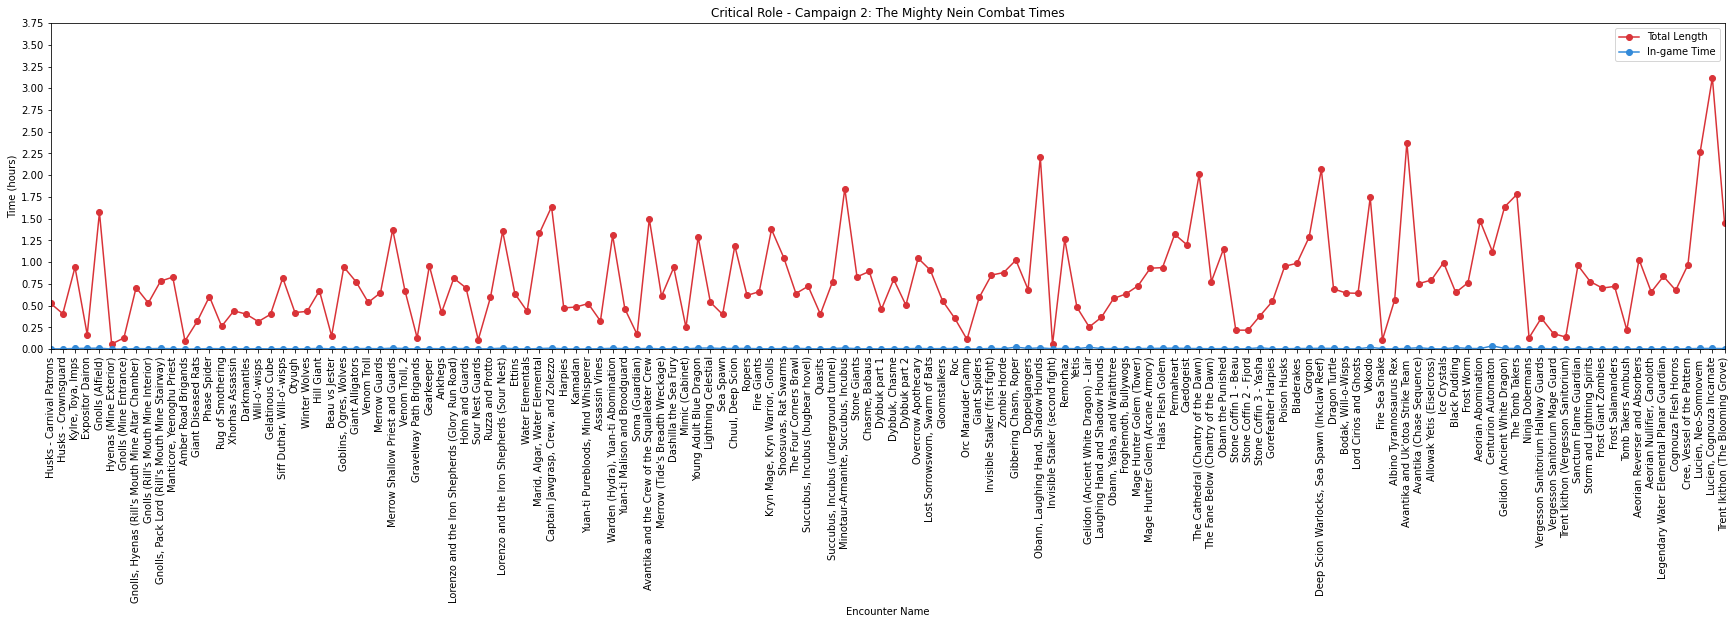

In [1391]:
combatdf['Total Length'] = pd.to_timedelta(combatdf['Total Length'])
combatdf['In-game Time'] = pd.to_timedelta(combatdf['In-game Time'])

# Convert timedelta to hours
combatdf['Total Length'] = combatdf['Total Length'].dt.total_seconds() / 3600
combatdf['In-game Time'] = combatdf['In-game Time'].dt.total_seconds() / 3600

# Plot the data
plt.figure(figsize=(30, 6))
plt.plot(combatdf['Encounter'], combatdf['Total Length'] , color = '#d93338',marker='o', label='Total Length') #can add marker='o' to put circles on points
plt.plot(combatdf['Encounter'], combatdf['In-game Time'], color = '#338ad9', marker='o', label='In-game Time')

# Fill the areas between the lines
#plt.fill_between(df['Episode'], df['Full time'], df['Gameplay Time'], color='#d93338', alpha=0.3)
#plt.fill_between(df['Episode'], df['Gameplay Time'], df['Mid Break'], color='#338ad9', alpha=0.3)
#plt.fill_between(df['Episode'], df['Mid Break'], color='#33d982', alpha=0.3)

# Add labels and title
plt.xlabel('Encounter Name')
plt.ylabel('Time (hours)')
plt.xlim(0,137);
plt.ylim(0, 3.5)
plt.title('Critical Role - Campaign 2: The Mighty Nein Combat Times')
plt.legend()

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 4, .25))

# Show the plot
plt.show()

# Trying a Different Thing

In [1392]:
combatdf_test = pd.read_csv(r"C:\Users\annas\Downloads\Copy of Running Times - Wildemount - WM Combat Times (2).csv")
combatdf_test.head(10)

,Encounter,Episode,Total Length,Start Time,End Time,Rounds,In-game Time,Unnamed: 7,Notes
0,Total of All Episodes,NaN,108:40:11,NaN,NaN,571.00,0:57:06,NaN,NaN
1,Average,NaN,0:47:15,1:48:28,2:35:43,4.14,0:00:25,NaN,NaN
2,Husks - Carnival Patrons,C2E001,0:31:38,2:24:16,2:55:54,2.00,0:00:12,NaN,NaN
3,Husks - Crownsguard,C2E003,0:24:28,0:09:16,0:33:44,2.00,0:00:12,NaN,NaN
4,"Kylre, Toya, Imps",C2E003,0:56:33,2:43:14,3:39:47,5.00,0:00:30,NaN,NaN
5,Expositor Dairon,C2E004,0:09:58,2:19:46,2:29:44,6.00,0:00:36,NaN,NaN
6,Gnolls (Alfield),C2E005,1:34:20,1:21:34,2:55:54,7.00,0:00:42,NaN,2 prep + 5 rounds
7,Hyenas (Mine Exterior),C2E006,0:03:34,1:38:53,1:42:27,1.00,0:00:06,NaN,NaN
8,Gnolls (Mine Entrance),C2E006,0:07:45,1:57:33,2:05:18,1.00,0:00:06,NaN,NaN
9,"Gnolls, Hyenas (Rill's Mouth Mine Altar Chamber)",C2E006,0:42:27,2:54:41,3:37:08,4.00,0:00:24,NaN,surprise + 3 rounds


In [1393]:
combatdf_test = combatdf_test.drop([0, 1])
combatdf_test = combatdf_test.drop(['Unnamed: 7','Start Time', 'End Time', 'Notes', 'In-game Time'], axis = 1)
combatdf_test

,Encounter,Episode,Total Length,Rounds
2,Husks - Carnival Patrons,C2E001,0:31:38,2.0
3,Husks - Crownsguard,C2E003,0:24:28,2.0
4,"Kylre, Toya, Imps",C2E003,0:56:33,5.0
5,Expositor Dairon,C2E004,0:09:58,6.0
6,Gnolls (Alfield),C2E005,1:34:20,7.0
...,...,...,...,...
136,Cognouza Flesh Horros,C2E137,0:40:40,2.0
137,"Cree, Vessel of the Pattern",C2E138,0:58:08,3.0
138,"Lucien, Neo-Somnovem",C2E139,2:15:51,5.0
139,"Lucien, Cognouza Incarnate",C2E140,3:07:18,5.0


In [1394]:
combatdf_test['Episode'] = combatdf_test['Episode'].str.replace('C2E', '')
combatdf_test.head(10)

,Encounter,Episode,Total Length,Rounds
2,Husks - Carnival Patrons,001,0:31:38,2.0
3,Husks - Crownsguard,003,0:24:28,2.0
4,"Kylre, Toya, Imps",003,0:56:33,5.0
5,Expositor Dairon,004,0:09:58,6.0
6,Gnolls (Alfield),005,1:34:20,7.0
7,Hyenas (Mine Exterior),006,0:03:34,1.0
8,Gnolls (Mine Entrance),006,0:07:45,1.0
9,"Gnolls, Hyenas (Rill's Mouth Mine Altar Chamber)",006,0:42:27,4.0
10,Gnolls (Rill's Mouth Mine Interior),007,0:31:51,3.0
11,"Gnolls, Pack Lord (Rill's Mouth Mine Stairway)",007,0:46:55,5.0


In [1433]:
# Convert 'Total Length' column to timedelta format
combatdf_test['Total Length'] = pd.to_timedelta(combatdf_test['Total Length'])

# Group by 'Episode' and sum the 'Total Length' values, converting to hours directly
grouped_combatdf = combatdf_test.groupby('Episode')['Total Length'].sum().reset_index()
grouped_combatdf['Total Length'] = grouped_combatdf['Total Length'].dt.total_seconds() / 3600


grouped_combatdf.iloc[40:51]

,Episode,Total Length
40,054,0.723611
41,055,3.025278
42,059,1.725000
43,060,1.767778
44,063,1.045833
45,064,0.907778
46,065,0.556111
47,066,0.467222
48,067,2.326944
49,068,1.709167


In [1396]:
print(combatdf_test['Total Length'].dtype)

timedelta64[ns]


## TOTAL Combat Summary

In [1397]:
# Calculate minimum, maximum, and mean of 'Total Length'
total_length_min = grouped_combatdf['Total Length'].min()
total_length_max = grouped_combatdf['Total Length'].max()
total_length_mean = grouped_combatdf['Total Length'].mean()

print("Minimum Total Combat Length", total_length_min)
print("Maximum Total Combat Length", total_length_max)
print("Mean Total Combat Length", total_length_mean)

Minimum Total Combat Length 0.095
Maximum Total Combat Length 3.4155555555555557
Mean Total Combat Length 1.1560608747044914


In [1398]:
# Convert minimum, maximum, and mean values back to 00:00:00 format
total_length_min_formatted = str(pd.to_datetime(total_length_min, unit='h').time())
total_length_max_formatted = str(pd.to_datetime(total_length_max, unit='h').time())
total_length_mean_formatted = str(pd.to_datetime(total_length_mean, unit='h').time())

print("Minimum Total Combat Length:", total_length_min_formatted)
print("Maximum Total Combat Length:", total_length_max_formatted)
print("Mean Total Combat Length:", total_length_mean_formatted)

Minimum Total Combat Length: 00:05:42
Maximum Total Combat Length: 03:24:56
Mean Total Combat Length: 01:09:21.819148


## First Rendition of the Different Thing

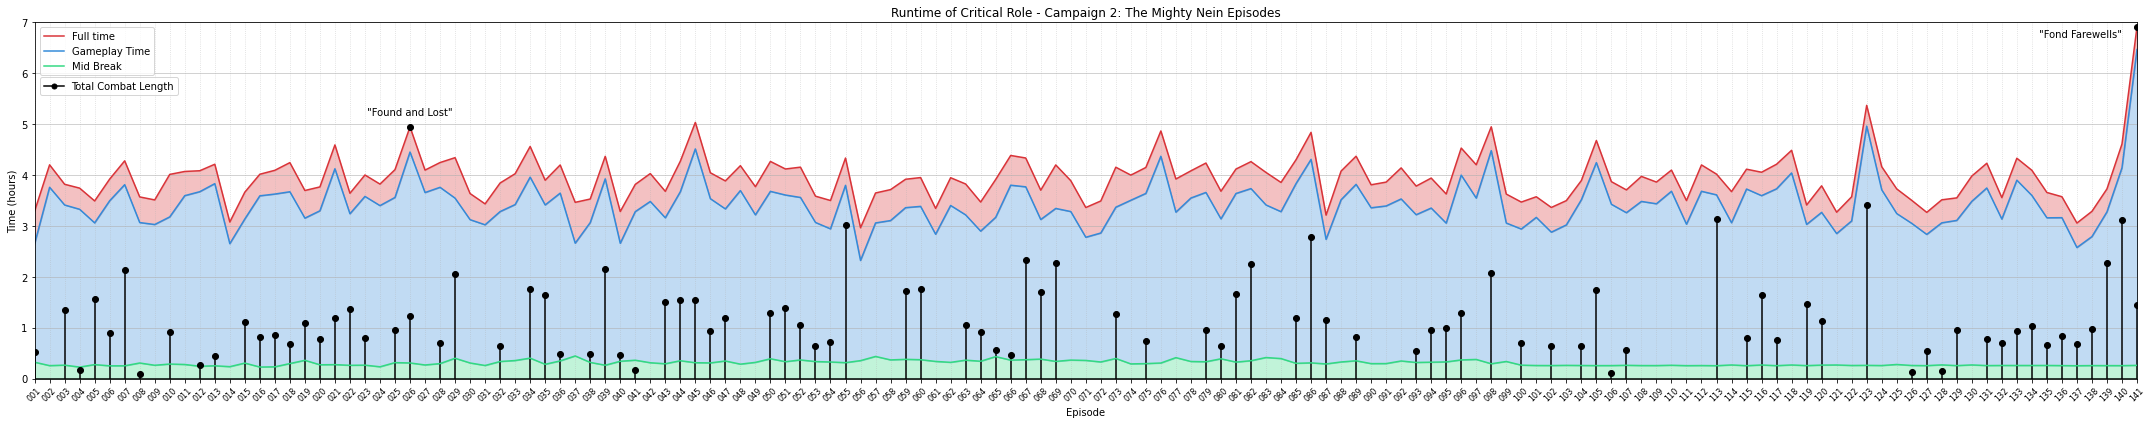

In [1399]:
import matplotlib.lines as mlines

# Plot the data
plt.figure(figsize=(30, 6))
plt.plot(df['Episode'], df['Full time'], color = '#d93338', label='Full time') #can add marker='o' to put circles on points
plt.plot(df['Episode'], df['Gameplay Time'], color = '#338ad9', label='Gameplay Time')
plt.plot(df['Episode'], df['Mid Break'], color = '#33d982', label='Mid Break')

# Plot the lollipop chart using the grouped_combatdf
lollipop_plot = plt.stem(grouped_combatdf['Episode'], grouped_combatdf['Total Length'], linefmt='k', markerfmt='ko', basefmt='k-')

# Add custom legend handler for the lollipop chart
lollipop_legend = mlines.Line2D([], [], color='k', marker='o', linestyle='-', markersize=5, label='Total Combat Length')

# Add existing legend for 'Full time', 'Gameplay Time', and 'Mid Break'
existing_legend = plt.legend()

# Combine the legends
plt.gca().add_artist(existing_legend)
plt.legend(handles=[lollipop_legend], loc='upper left',  bbox_to_anchor=(0, .86))

# Fill the areas between the lines
plt.fill_between(df['Episode'], df['Full time'], df['Gameplay Time'], color='#d93338', alpha=0.3)
plt.fill_between(df['Episode'], df['Gameplay Time'], df['Mid Break'], color='#338ad9', alpha=0.3)
plt.fill_between(df['Episode'], df['Mid Break'], color='#33d982', alpha=0.3)

# Add x-axis grid lines (dotted) behind the lollipop chart
plt.grid(axis='x', linestyle=':', alpha=0.5)

# Add y-axis grid lines (solid)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Time (hours)')
plt.xlim('001', '141')
plt.ylim(0, 7)
plt.title('Runtime of Critical Role - Campaign 2: The Mighty Nein Episodes')

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation=45, fontsize=8)

# Add text labels
plt.text(df['Episode'][27], df['Full time'][27] + .2, '\"Found and Lost\"', ha='center', va='bottom', fontsize=10)
plt.plot(df['Episode'][27], df['Full time'][27], marker='o', color='black')
plt.text(df['Episode'][141], df['Full time'][142] - .2, '\"Fond Farewells\"', ha='right', fontsize=10)
plt.plot(df['Episode'][142], df['Full time'][142], marker='o', color='black')

# Show the plot
plt.tight_layout()
plt.show()

## Different Thing but Better

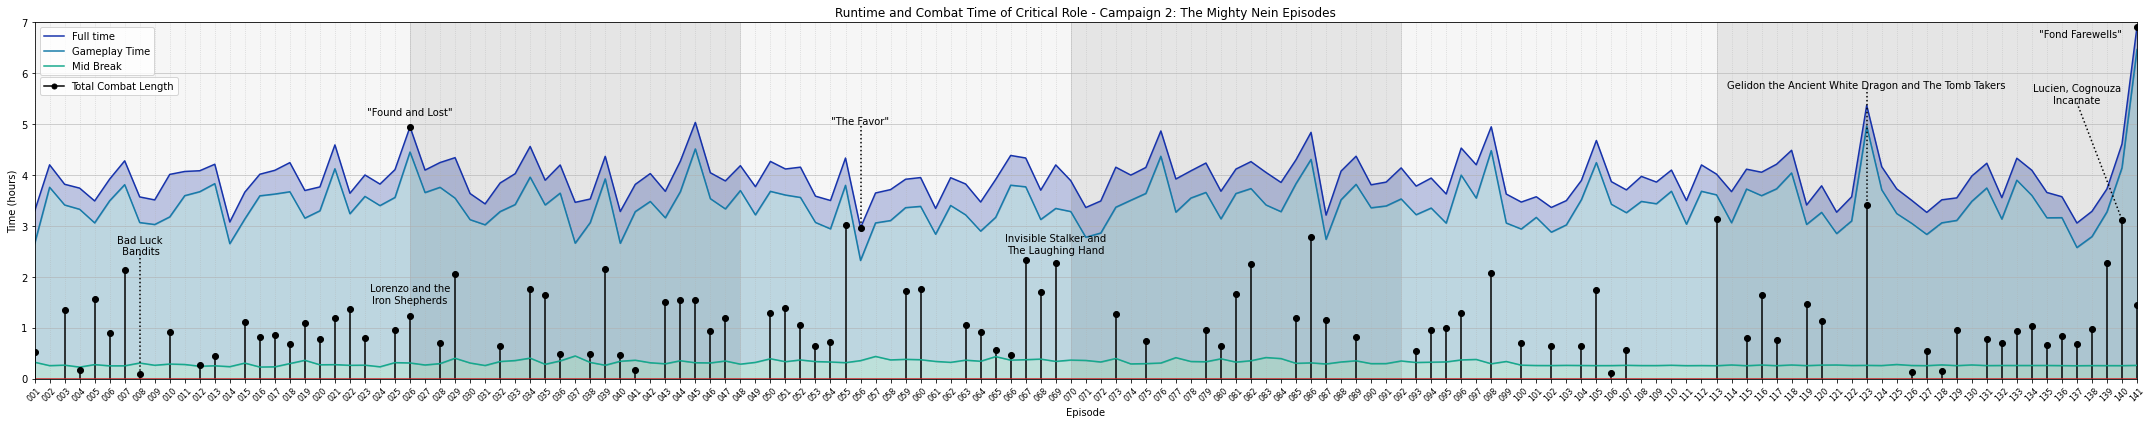

In [1442]:
import matplotlib.lines as mlines

# Plot the data
plt.figure(figsize=(30, 6))
plt.plot(df['Episode'], df['Full time'], color = '#1632aB', label='Full time') #can add marker='o' to put circles on points
plt.plot(df['Episode'], df['Gameplay Time'], color = '#167ba8', label='Gameplay Time')
plt.plot(df['Episode'], df['Mid Break'], color = '#16a88c', label='Mid Break')

# Plot the lollipop chart using the grouped_combatdf
lollipop_plot = plt.stem(grouped_combatdf['Episode'], grouped_combatdf['Total Length'], markerfmt='o')

(markers, stemlines, baseline) = lollipop_plot 
plt.setp(stemlines, linestyle="-", color="k")
plt.setp(markers, color="k")

# Add custom legend handler for the lollipop chart
lollipop_legend = mlines.Line2D([], [], color='k', marker='o', linestyle='-', markersize=5, label='Total Combat Length')

# Add existing legend for 'Full time', 'Gameplay Time', and 'Mid Break'
existing_legend = plt.legend()

# Combine the legends
plt.gca().add_artist(existing_legend)
plt.legend(handles=[lollipop_legend], loc='upper left',  bbox_to_anchor=(0, .86))

# Fill the areas between the lines
plt.fill_between(df['Episode'], df['Full time'], df['Gameplay Time'], color='#1632aB', alpha=0.3)
plt.fill_between(df['Episode'], df['Gameplay Time'], df['Mid Break'], color='#167ba8', alpha=0.3)
plt.fill_between(df['Episode'], df['Mid Break'], color='#16a88c', alpha=0.3)

# Add x-axis grid lines (dotted) behind the lollipop chart
plt.grid(axis='x', linestyle=':', alpha=0.5)

# Add y-axis grid lines (solid)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Time (hours)')
plt.xlim('001', '141')
plt.ylim(0, 7)
plt.title('Runtime and Combat Time of Critical Role - Campaign 2: The Mighty Nein Episodes')

# Rotate x-axis tick labels to 45 degrees
plt.xticks(rotation=45, fontsize=8)

# Add text labels
plt.text(df['Episode'][9], grouped_combatdf['Total Length'][9] +2, 'Bad Luck\n Bandits', ha='center', fontsize=10)
# Get the coordinates of the lollipop marker
marker_x = grouped_combatdf['Episode'][6]
marker_y = grouped_combatdf['Total Length'][6]
# Draw a dotted line connecting the text label to the lollipop marker
plt.plot([df['Episode'][9], marker_x], [grouped_combatdf['Total Length'][9] + 2, marker_y], linestyle=':', color='black')

plt.text(df['Episode'][27], df['Full time'][27] + .2, '\"Found and Lost\"', ha='center', va='bottom', fontsize=10)
plt.plot(df['Episode'][27], df['Full time'][27], marker='o', color='black')
plt.text(df['Episode'][27], grouped_combatdf['Total Length'][27] + 1, 'Lorenzo and the\nIron Shepherds', ha='center', fontsize=10)

plt.text(df['Episode'][57], df['Full time'][57] +2.2, '\"The Favor\"', ha='center', va='top', fontsize=10)
plt.plot(df['Episode'][57], df['Full time'][57], marker='o', color='black')
marker_x1 = df['Episode'][57]
marker_y1 = df['Full time'][57]
plt.plot([df['Episode'][57], marker_x1], [df['Full time'][57] + 2, marker_y1], linestyle=':', color='black')

plt.text(df['Episode'][124], grouped_combatdf['Total Length'][79] +2.3, 'Gelidon the Ancient White Dragon and The Tomb Takers', ha='center', fontsize=10)
# Get the coordinates of the lollipop marker
marker_x2 = grouped_combatdf['Episode'][79]
marker_y2 = grouped_combatdf['Total Length'][79]
# Draw a dotted line connecting the text label to the lollipop marker
plt.plot([df['Episode'][124], marker_x2], [grouped_combatdf['Total Length'][79] + 2.3, marker_y2], linestyle=':', color='black')

plt.text(df['Episode'][138], grouped_combatdf['Total Length'][93] +2.3, 'Lucien, Cognouza\nIncarnate', ha='center', fontsize=10)
# Get the coordinates of the lollipop marker
marker_x3 = grouped_combatdf['Episode'][93]
marker_y3 = grouped_combatdf['Total Length'][93]
# Draw a dotted line connecting the text label to the lollipop marker
plt.plot([df['Episode'][138], marker_x3], [grouped_combatdf['Total Length'][93] + 2.3, marker_y3], linestyle=':', color='black')

plt.text(df['Episode'][70], grouped_combatdf['Total Length'][50] +.2, 'Invisible Stalker and\nThe Laughing Hand', ha='center', fontsize=10)

plt.text(df['Episode'][141], df['Full time'][142] - .2, '\"Fond Farewells\"', ha='right', fontsize=10)
plt.plot(df['Episode'][142], df['Full time'][142], marker='o', color='black')

# Add colored background for the arcs
plt.axvspan(df['Episode'].iloc[0], df['Episode'].iloc[25], color='lightgrey', alpha=0.2)
plt.axvspan(df['Episode'].iloc[25], df['Episode'].iloc[47], color='grey', alpha=0.2)
plt.axvspan(df['Episode'].iloc[47], df['Episode'].iloc[69], color='lightgrey', alpha=0.2)
plt.axvspan(df['Episode'].iloc[69], df['Episode'].iloc[91], color='grey', alpha=0.2)
plt.axvspan(df['Episode'].iloc[91], df['Episode'].iloc[112], color='lightgrey', alpha=0.2)
plt.axvspan(df['Episode'].iloc[112], df['Episode'].iloc[140], color='grey', alpha=0.2)

# Show the plot
plt.tight_layout()
plt.show()

# Everything below this isn't being used :)

# Damage Dealt

In [1401]:
damagedf = pd.read_csv(r"C:\Users\annas\Downloads\Damage Dealt - Wildemount - Totals.csv")
damagedf.head(10)

,Player,Fjord,Beauregard,Caleb,Nott/Veth,Jester,Mollymauk,Yasha,Caduceus
0,Average (per ep),40.978,42.234,37.454,39.596,26.628,24.621,43.578,16.632
1,Total,5614.000,5955.000,5281.000,5583.000,3648.000,714.000,4750.000,1896.000
2,02-01,40.000,30.000,9.000,14.000,21.000,24.000,13.000,NaN
3,02-02,0.000,0.000,1.000,0.000,0.000,0.000,NaN,NaN
4,02-03,73.000,52.000,13.000,34.000,6.000,55.000,NaN,NaN
5,02-04,0.000,31.000,0.000,0.000,0.000,0.000,0.000,NaN
6,02-05,24.000,48.000,30.000,12.000,66.000,25.000,NaN,NaN
7,02-06,70.000,29.000,8.000,58.000,41.000,36.000,NaN,NaN
8,02-07,126.000,51.000,53.000,68.000,29.000,85.000,NaN,NaN
9,02-08,12.000,5.000,37.000,0.000,7.000,3.000,NaN,NaN


In [1402]:
damagedf = damagedf.drop(['Player'], axis = 1)
damagedf

,Fjord,Beauregard,Caleb,Nott/Veth,Jester,Mollymauk,Yasha,Caduceus
0,40.978,42.234,37.454,39.596,26.628,24.621,43.578,16.632
1,5614.000,5955.000,5281.000,5583.000,3648.000,714.000,4750.000,1896.000
2,40.000,30.000,9.000,14.000,21.000,24.000,13.000,NaN
3,0.000,0.000,1.000,0.000,0.000,0.000,NaN,NaN
4,73.000,52.000,13.000,34.000,6.000,55.000,NaN,NaN
...,...,...,...,...,...,...,...,...
138,65.000,33.000,173.000,8.000,60.000,NaN,36.000,25.000
139,141.000,58.000,0.000,140.000,0.000,NaN,132.000,0.000
140,67.000,168.000,32.000,239.000,0.000,NaN,70.000,18.000
141,152.000,210.000,72.000,185.000,76.000,0.000,182.000,13.000


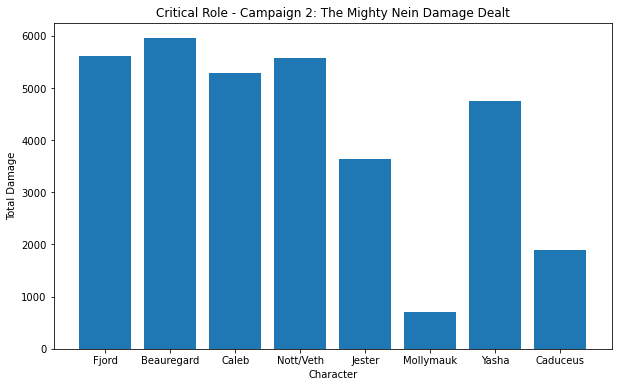

In [1403]:
column_names = damagedf.columns
values = damagedf.iloc[1]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(column_names, values)

# Add labels and title
plt.xlabel('Character')
plt.ylabel('Total Damage')
plt.title('Critical Role - Campaign 2: The Mighty Nein Damage Dealt')

# Show the plot
plt.show()

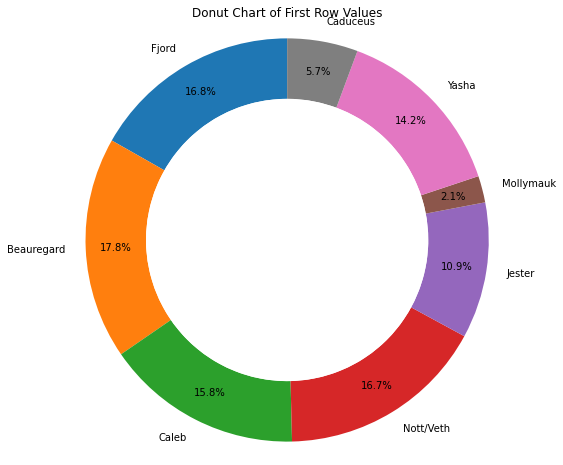

In [1404]:
column_names = damagedf.columns
values = damagedf.iloc[1]

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=column_names, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Donut Chart of First Row Values')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

# Healing Given

In [1405]:
healdf = pd.read_csv(r"C:\Users\annas\Downloads\Healing Given - Wildemount - Totals.csv")
healdf.head(10)

,Player,Fjord,Beauregard,Caleb,Nott/Veth,Jester,Mollymauk,Yasha,Caduceus
0,Average (per ep),2.496,0.255,0.936,0.56,13.46,-,1.45,46.395
1,Total,342.000,36.000,132.000,79.00,1844.00,0,158.00,5289.000
2,02-01,0.000,0.000,0.000,0.00,17.00,0,0.00,NaN
3,02-02,0.000,0.000,0.000,0.00,0.00,0,NaN,NaN
4,02-03,0.000,0.000,0.000,0.00,14.00,0,NaN,NaN
5,02-04,0.000,0.000,0.000,0.00,0.00,0,0.00,NaN
6,02-05,0.000,0.000,0.000,0.00,22.00,0,NaN,NaN
7,02-06,0.000,0.000,0.000,0.00,9.00,0,NaN,NaN
8,02-07,15.000,0.000,0.000,0.00,8.00,0,NaN,NaN
9,02-08,0.000,0.000,0.000,0.00,15.00,0,NaN,NaN


In [1406]:
healdf = healdf.drop(['Player'], axis = 1)
healdf

,Fjord,Beauregard,Caleb,Nott/Veth,Jester,Mollymauk,Yasha,Caduceus
0,2.496,0.255,0.936,0.56,13.46,-,1.45,46.395
1,342.000,36.000,132.000,79.00,1844.00,0,158.00,5289.000
2,0.000,0.000,0.000,0.00,17.00,0,0.00,NaN
3,0.000,0.000,0.000,0.00,0.00,0,NaN,NaN
4,0.000,0.000,0.000,0.00,14.00,0,NaN,NaN
...,...,...,...,...,...,...,...,...
138,0.000,0.000,0.000,0.00,0.00,NaN,0.00,126.000
139,17.000,0.000,0.000,0.00,0.00,NaN,0.00,0.000
140,0.000,0.000,0.000,0.00,155.00,NaN,0.00,83.000
141,34.000,0.000,10.000,0.00,152.00,0,15.00,99.000


In [1407]:
row_index = 1
column_name = 'Mollymauk'
healdf.at[row_index, column_name] = float(healdf.at[row_index, column_name])
healdf

,Fjord,Beauregard,Caleb,Nott/Veth,Jester,Mollymauk,Yasha,Caduceus
0,2.496,0.255,0.936,0.56,13.46,-,1.45,46.395
1,342.000,36.000,132.000,79.00,1844.00,0.0,158.00,5289.000
2,0.000,0.000,0.000,0.00,17.00,0,0.00,NaN
3,0.000,0.000,0.000,0.00,0.00,0,NaN,NaN
4,0.000,0.000,0.000,0.00,14.00,0,NaN,NaN
...,...,...,...,...,...,...,...,...
138,0.000,0.000,0.000,0.00,0.00,NaN,0.00,126.000
139,17.000,0.000,0.000,0.00,0.00,NaN,0.00,0.000
140,0.000,0.000,0.000,0.00,155.00,NaN,0.00,83.000
141,34.000,0.000,10.000,0.00,152.00,0,15.00,99.000


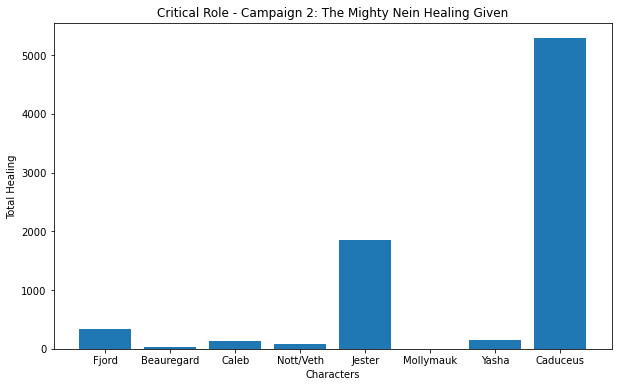

In [1408]:
column_names = healdf.columns
values = healdf.iloc[1]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(column_names, values)

# Add labels and title
plt.xlabel('Characters')
plt.ylabel('Total Healing')
plt.title('Critical Role - Campaign 2: The Mighty Nein Healing Given')

# Show the plot
plt.show()

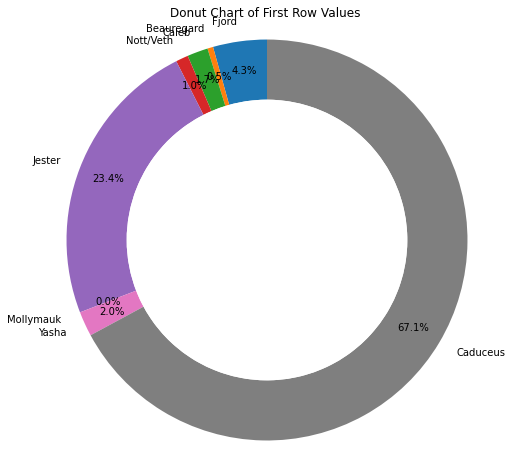

In [1409]:
column_names = healdf.columns
values = healdf.iloc[1]

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=column_names, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Donut Chart of First Row Values')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()